<a href="https://colab.research.google.com/github/Bmo411/Deeplearning/blob/main/VaeClenaImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import requests
from bs4 import BeautifulSoup
import time
import random
import shutil
from urllib.parse import urljoin

# Crear directorios para guardar las imágenes
def crear_directorios(limpiar=True):
    for fruta in ['fresas', 'pinas']:
        # Si existe el directorio y queremos limpiarlo
        if os.path.exists(fruta) and limpiar:
            # Eliminar todos los archivos dentro
            shutil.rmtree(fruta)
            print(f"Carpeta '{fruta}' limpiada.")

        # Crear el directorio (ya sea nuevo o recién limpiado)
        if not os.path.exists(fruta):
            os.makedirs(fruta)

    print("Directorios creados/limpiados con éxito.")

# Headers para simular un navegador
def get_headers():
    user_agents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'
    ]
    return {'User-Agent': random.choice(user_agents)}

# Función para descargar imágenes de una búsqueda específica
def descargar_imagenes(termino_busqueda, carpeta, cantidad=100):
    contador = 0
    pagina = 1

    print(f"Iniciando descarga de {cantidad} imágenes de {termino_busqueda}...")

    while contador < cantidad:
        # Usamos Bing Images para obtener resultados
        url = f"https://www.bing.com/images/search?q={termino_busqueda}+png+transparent&first={pagina}&count=35&qft=+filterui:photo-transparent"

        try:
            response = requests.get(url, headers=get_headers(), timeout=10)
            response.raise_for_status()

            soup = BeautifulSoup(response.text, 'html.parser')
            # Encontrar enlaces de imágenes en Bing
            imagenes = soup.find_all("a", class_="iusc")

            if not imagenes:
                print(f"No se encontraron más imágenes para {termino_busqueda} en la página {pagina}")
                break

            for img in imagenes:
                if contador >= cantidad:
                    break

                try:
                    # Extraer el enlace de la imagen de los atributos de datos
                    m = img.get("m")
                    if m and "png" in m.lower():
                        data = eval(m)
                        img_url = data.get('murl')

                        if not img_url or not img_url.lower().endswith('.png'):
                            continue

                        # Generar nombre de archivo único
                        nombre_archivo = f"{carpeta}/{termino_busqueda}_{contador+1}.png"

                        # Descargar la imagen
                        img_response = requests.get(img_url, headers=get_headers(), timeout=10)
                        img_response.raise_for_status()

                        with open(nombre_archivo, 'wb') as f:
                            f.write(img_response.content)

                        print(f"Descargada: {nombre_archivo}")
                        contador += 1

                        # Pequeña pausa para evitar ser bloqueado
                        time.sleep(random.uniform(0.5, 1.5))

                except Exception as e:
                    print(f"Error al procesar imagen: {e}")
                    continue

            # Pasar a la siguiente página
            pagina += 35

            # Pausa entre páginas
            time.sleep(random.uniform(2, 4))

        except Exception as e:
            print(f"Error en la página {pagina}: {e}")
            pagina += 35
            time.sleep(5)

    print(f"Se descargaron {contador} imágenes de {termino_busqueda}")
    return contador

# Función principal
def main():
    # Crear directorios y limpiarlos (por defecto)
    crear_directorios(limpiar=True)

    # Descargar imágenes de fresas
    total_fresas = descargar_imagenes("fresa", "fresas")

    # Descargar imágenes de piñas
    total_pinas = descargar_imagenes("pineapple", "pinas")

    print(f"\nResumen de descarga:")
    print(f"- Fresas: {total_fresas}/100")
    print(f"- Piñas: {total_pinas}/100")
    print("\nProceso completado!")

if __name__ == "__main__":
    main()

Directorios creados/limpiados con éxito.
Iniciando descarga de 100 imágenes de fresa...
Error al procesar imagen: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/026/770/824/non_2x/strawberry-transparent-free-png.png
Error al procesar imagen: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/024/596/060/non_2x/strawberry-strawberry-with-transparent-background-transparent-strawberry-ai-generated-free-png.png
Error al procesar imagen: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/015/100/113/non_2x/strawberry-transparent-background-free-png.png
Error al procesar imagen: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/029/200/357/non_2x/strawberry-transparent-background-free-png.png
Error al procesar imagen: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/029/200/081/non_2x/str

In [10]:
import os
import requests
from bs4 import BeautifulSoup
import time
import random
import shutil
from urllib.parse import urljoin
from PIL import Image
import io

# Crear directorios para guardar las imágenes
def crear_directorios(limpiar=True):
    for fruta in ['fresas', 'pinas', 'fresas_procesadas', 'pinas_procesadas']:
        # Si existe el directorio y queremos limpiarlo
        if os.path.exists(fruta) and limpiar:
            # Eliminar todos los archivos dentro
            shutil.rmtree(fruta)
            print(f"Carpeta '{fruta}' limpiada.")

        # Crear el directorio (ya sea nuevo o recién limpiado)
        if not os.path.exists(fruta):
            os.makedirs(fruta)

    print("Directorios creados/limpiados con éxito.")

# Headers para simular un navegador
def get_headers():
    user_agents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'
    ]
    return {'User-Agent': random.choice(user_agents)}

# Función para descargar imágenes de una búsqueda específica
def descargar_imagenes(termino_busqueda, carpeta, cantidad=100):
    contador = 0
    pagina = 1

    print(f"Iniciando descarga de {cantidad} imágenes de {termino_busqueda}...")

    while contador < cantidad:
        # Usamos Bing Images para obtener resultados
        url = f"https://www.bing.com/images/search?q={termino_busqueda}+png+transparent&first={pagina}&count=35&qft=+filterui:photo-transparent"

        try:
            response = requests.get(url, headers=get_headers(), timeout=10)
            response.raise_for_status()

            soup = BeautifulSoup(response.text, 'html.parser')
            # Encontrar enlaces de imágenes en Bing
            imagenes = soup.find_all("a", class_="iusc")

            if not imagenes:
                print(f"No se encontraron más imágenes para {termino_busqueda} en la página {pagina}")
                break

            for img in imagenes:
                if contador >= cantidad:
                    break

                try:
                    # Extraer el enlace de la imagen de los atributos de datos
                    m = img.get("m")
                    if m and "png" in m.lower():
                        data = eval(m)
                        img_url = data.get('murl')

                        if not img_url or not img_url.lower().endswith('.png'):
                            continue

                        # Generar nombre de archivo único
                        nombre_archivo = f"{carpeta}/{termino_busqueda}_{contador+1}.png"

                        # Descargar la imagen
                        img_response = requests.get(img_url, headers=get_headers(), timeout=10)
                        img_response.raise_for_status()

                        with open(nombre_archivo, 'wb') as f:
                            f.write(img_response.content)

                        print(f"Descargada: {nombre_archivo}")
                        contador += 1

                        # Pequeña pausa para evitar ser bloqueado
                        time.sleep(random.uniform(0.5, 1.5))

                except Exception as e:
                    print(f"Error al procesar imagen: {e}")
                    continue

            # Pasar a la siguiente página
            pagina += 35

            # Pausa entre páginas
            time.sleep(random.uniform(2, 4))

        except Exception as e:
            print(f"Error en la página {pagina}: {e}")
            pagina += 35
            time.sleep(5)

    print(f"Se descargaron {contador} imágenes de {termino_busqueda}")
    return contador

# Función para procesar las imágenes (redimensionar a 64x64 y centrar en fondo blanco de 100x100)
def procesar_imagenes(carpeta_origen, carpeta_destino):
    if not os.path.exists(carpeta_origen):
        print(f"La carpeta de origen {carpeta_origen} no existe.")
        return 0

    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    imagenes = [f for f in os.listdir(carpeta_origen) if f.endswith('.png')]
    total_procesadas = 0

    print(f"Procesando {len(imagenes)} imágenes de {carpeta_origen}...")

    for img_nombre in imagenes:
        try:
            # Ruta completa de la imagen original
            img_path = os.path.join(carpeta_origen, img_nombre)

            # Abrir la imagen
            img = Image.open(img_path)

            # Convertir a RGBA si no lo es ya (para manejar transparencia)
            if img.mode != 'RGBA':
                img = img.convert('RGBA')

            # Redimensionar a 64x64 manteniendo la proporción
            img.thumbnail((64, 64), Image.LANCZOS)

            # Crear una nueva imagen de 100x100 con fondo blanco
            fondo_blanco = Image.new('RGBA', (100, 100), (255, 255, 255, 255))

            # Calcular la posición para centrar la imagen
            posicion = ((100 - img.width) // 2, (100 - img.height) // 2)

            # Pegar la imagen redimensionada en el fondo blanco
            fondo_blanco.paste(img, posicion, img)

            # Guardar la imagen procesada
            ruta_destino = os.path.join(carpeta_destino, img_nombre)
            fondo_blanco.save(ruta_destino, 'PNG')

            total_procesadas += 1
            print(f"Procesada: {ruta_destino}")

        except Exception as e:
            print(f"Error al procesar {img_nombre}: {e}")

    print(f"Se procesaron {total_procesadas} imágenes de {carpeta_origen}")
    return total_procesadas

In [11]:
    # Procesar las imágenes descargadas
    print("\nIniciando procesamiento de imágenes...")
    total_fresas_procesadas = procesar_imagenes("fresas", "fresas_procesadas")
    total_pinas_procesadas = procesar_imagenes("pinas", "pinas_procesadas")
    print("Procesamiento completado!")


Iniciando procesamiento de imágenes...
Procesando 100 imágenes de fresas...
Procesada: fresas_procesadas/fresa_12.png
Procesada: fresas_procesadas/fresa_84.png
Procesada: fresas_procesadas/fresa_60.png
Procesada: fresas_procesadas/fresa_8.png
Procesada: fresas_procesadas/fresa_16.png
Procesada: fresas_procesadas/fresa_39.png
Procesada: fresas_procesadas/fresa_70.png
Procesada: fresas_procesadas/fresa_28.png
Procesada: fresas_procesadas/fresa_41.png
Procesada: fresas_procesadas/fresa_81.png
Procesada: fresas_procesadas/fresa_66.png
Procesada: fresas_procesadas/fresa_91.png
Procesada: fresas_procesadas/fresa_5.png
Procesada: fresas_procesadas/fresa_56.png
Procesada: fresas_procesadas/fresa_15.png
Procesada: fresas_procesadas/fresa_58.png
Procesada: fresas_procesadas/fresa_9.png
Procesada: fresas_procesadas/fresa_13.png
Procesada: fresas_procesadas/fresa_40.png
Procesada: fresas_procesadas/fresa_7.png
Procesada: fresas_procesadas/fresa_50.png
Procesada: fresas_procesadas/fresa_89.png
Pro

In [46]:
import os
import numpy as np
from PIL import Image
import struct
import gzip
import shutil

def crear_dataset_mnist(carpeta_fresas, carpeta_pinas, ruta_salida="dataset_frutas"):
    """
    Convierte las imágenes de fresas y piñas en un formato similar a MNIST.
    MNIST usa el formato IDX para almacenar matrices multidimensionales de enteros.

    Estructura MNIST:
    - train-images-idx3-ubyte: imágenes de entrenamiento
    - train-labels-idx1-ubyte: etiquetas de entrenamiento
    - t10k-images-idx3-ubyte: imágenes de prueba
    - t10k-labels-idx1-ubyte: etiquetas de prueba
    """
    # Crear directorio de salida
    if not os.path.exists(ruta_salida):
        os.makedirs(ruta_salida)

    # Cargar imágenes de fresas (etiqueta 0)
    imagenes_fresas = cargar_imagenes(carpeta_fresas)
    print(f"Imágenes de fresas cargadas: {len(imagenes_fresas)}")

    # Cargar imágenes de piñas (etiqueta 1)
    imagenes_pinas = cargar_imagenes(carpeta_pinas)
    print(f"Imágenes de piñas cargadas: {len(imagenes_pinas)}")

    # Mezclar y dividir los datos (80% entrenamiento, 20% prueba)
    np.random.seed(42)  # Para reproducibilidad

    # Combinar todos los datos
    todas_imagenes = np.concatenate([imagenes_fresas, imagenes_pinas])
    todas_etiquetas = np.concatenate([
        np.zeros(len(imagenes_fresas), dtype=np.uint8),  # 0 para fresas
        np.ones(len(imagenes_pinas), dtype=np.uint8)     # 1 para piñas
    ])

    # Mezclar los datos
    indices = np.random.permutation(len(todas_imagenes))
    todas_imagenes = todas_imagenes[indices]
    todas_etiquetas = todas_etiquetas[indices]

    # Dividir en entrenamiento y prueba
    punto_division = int(len(todas_imagenes) * 0.8)

    train_images = todas_imagenes[:punto_division]
    train_labels = todas_etiquetas[:punto_division]

    test_images = todas_imagenes[punto_division:]
    test_labels = todas_etiquetas[punto_division:]

    print(f"Conjunto de entrenamiento: {len(train_images)} imágenes")
    print(f"Conjunto de prueba: {len(test_images)} imágenes")

    # Guardar en formato MNIST (IDX)
    guardar_imagenes_idx(train_images, os.path.join(ruta_salida, "train-images-idx3-ubyte"))
    guardar_etiquetas_idx(train_labels, os.path.join(ruta_salida, "train-labels-idx1-ubyte"))
    guardar_imagenes_idx(test_images, os.path.join(ruta_salida, "t10k-images-idx3-ubyte"))
    guardar_etiquetas_idx(test_labels, os.path.join(ruta_salida, "t10k-labels-idx1-ubyte"))

    # Comprimir los archivos como gzip (como en MNIST original)
    comprimir_archivos(ruta_salida)

    print(f"Dataset en formato MNIST creado en: {ruta_salida}")

    # Crear un script de ejemplo para cargar los datos

def cargar_imagenes(carpeta):
    """Carga todas las imágenes PNG de una carpeta y las convierte a arrays numpy (100x100)."""
    imagenes = []

    for archivo in sorted(os.listdir(carpeta)):
        if archivo.endswith(".png"):
            ruta_completa = os.path.join(carpeta, archivo)
            try:
                # Abrir la imagen y convertirla a escala de grises
                img = Image.open(ruta_completa).convert('L')  # L = escala de grises

                # Convertir a numpy array y normalizar a valores entre 0 y 255
                img_array = np.array(img, dtype=np.uint8)

                # Aplanar la imagen (de 100x100 a 10000)
                img_array = img_array.flatten()

                imagenes.append(img_array)
            except Exception as e:
                print(f"Error al procesar {ruta_completa}: {e}")

    return np.array(imagenes)

def guardar_imagenes_idx(imagenes, ruta_archivo):
    """Guarda las imágenes en formato IDX3 de MNIST."""
    # Formato IDX3: Magic number + dimensiones (filas, columnas) + datos
    n_imgs = len(imagenes)
    n_rows, n_cols = 100, 100  # Dimensiones de nuestras imágenes (100x100)

    with open(ruta_archivo, 'wb') as f:
        # Magic number para imágenes (2051)
        f.write(struct.pack('>IIII', 2051, n_imgs, n_rows, n_cols))
        # Datos de las imágenes
        f.write(imagenes.tobytes())

def guardar_etiquetas_idx(etiquetas, ruta_archivo):
    """Guarda las etiquetas en formato IDX1 de MNIST."""
    # Formato IDX1: Magic number + dimensión (número de etiquetas) + datos
    n_labels = len(etiquetas)

    with open(ruta_archivo, 'wb') as f:
        # Magic number para etiquetas (2049)
        f.write(struct.pack('>II', 2049, n_labels))
        # Datos de las etiquetas
        f.write(etiquetas.tobytes())

def comprimir_archivos(ruta_directorio):
    """Comprime los archivos IDX como gzip (formato estándar de MNIST)."""
    for archivo in os.listdir(ruta_directorio):
        if "idx" in archivo:
            ruta_completa = os.path.join(ruta_directorio, archivo)
            ruta_gz = ruta_completa + ".gz"

            with open(ruta_completa, 'rb') as f_in:
                with gzip.open(ruta_gz, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)

            # Opcional: eliminar el archivo original sin comprimir
            os.remove(ruta_completa)
            print(f"Archivo comprimido: {ruta_gz}")

# Función principal
def main():
    carpeta_fresas = "fresas_procesadas"
    carpeta_pinas = "pinas_procesadas"

    if not os.path.exists(carpeta_fresas) or not os.path.exists(carpeta_pinas):
        print(f"Error: No se encontraron las carpetas de imágenes procesadas.")
        print(f"Asegúrate de haber ejecutado primero el script de procesamiento de imágenes.")
        return

    crear_dataset_mnist(carpeta_fresas, carpeta_pinas)

if __name__ == "__main__":
    main()

Imágenes de fresas cargadas: 100
Imágenes de piñas cargadas: 100
Conjunto de entrenamiento: 160 imágenes
Conjunto de prueba: 40 imágenes
Archivo comprimido: dataset_frutas/train-labels-idx1-ubyte.gz
Archivo comprimido: dataset_frutas/t10k-images-idx3-ubyte.gz
Archivo comprimido: dataset_frutas/train-images-idx3-ubyte.gz
Archivo comprimido: dataset_frutas/t10k-labels-idx1-ubyte.gz
Dataset en formato MNIST creado en: dataset_frutas


In [47]:
#librerias del autoencoder
import torch
import torchsummary
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import gzip
import struct
import matplotlib.pyplot as plt


In [94]:
#variatonalautoencoder
class VAE(nn.Module):
  def __init__(self, input_dim, h_dim=400, z_dim=20):
    super().__init__()
    #encoder
    self.img_2hid = nn.Linear(input_dim, h_dim)
    self.hid_2mu = nn.Linear(h_dim, z_dim)
    self.hid_2sigma = nn.Linear(h_dim, z_dim)

    #decoder
    self.z_2hid = nn.Linear(z_dim, h_dim)
    self.hid_2img = nn.Linear(h_dim, input_dim)

    self.relu = nn.ReLU()
    #self.sigmoid = nn.sigmoid()

  def encode(self, x):
    h = self.relu(self.img_2hid(x))
    mu, sigma = self.hid_2mu(h), self.hid_2sigma(h)
    return mu, sigma

  def decode(self, z):
    h = self.relu(self.z_2hid(z))
    return torch.sigmoid(self.hid_2img(h))

  def forward(self, x):
    mu, sigma = self.encode(x)
    epsilon = torch.randn_like(sigma)
    z_reparametrized = mu + sigma * epsilon
    x_reconstructed = self.decode(z_reparametrized)
    return x_reconstructed, mu, sigma

if __name__ == "__main__":
    x= torch.randn(4, 28*28)
    vae = VAE(input_dim=784)
    x_reconstructed, mu, sigma = vae(x)
    print(x_reconstructed.shape, mu.shape, sigma.shape)
    #vaesumary
    torchsummary.summary(vae, (784,))


torch.Size([4, 784]) torch.Size([4, 20]) torch.Size([4, 20])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                   [-1, 20]           8,020
            Linear-4                   [-1, 20]           8,020
            Linear-5                  [-1, 400]           8,400
              ReLU-6                  [-1, 400]               0
            Linear-7                  [-1, 784]         314,384
Total params: 652,824
Trainable params: 652,824
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.49
Estimated Total Size (MB): 2.51
----------------------------------------------------------------


In [49]:
class FrutasDataset(Dataset):
    """Dataset personalizado para las imágenes de frutas en formato MNIST."""

    def __init__(self, images_file, labels_file, transform=None):
        """
        Args:
            images_file: Ruta al archivo de imágenes comprimido (.gz)
            labels_file: Ruta al archivo de etiquetas comprimido (.gz)
            transform: Transformaciones opcionales a aplicar a las imágenes
        """
        # Cargar imágenes
        with gzip.open(images_file, 'rb') as f:
            # Leer cabecera (corregido)
            magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
            # Leer imágenes (corregido)
            self.images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)

        # Cargar etiquetas
        with gzip.open(labels_file, 'rb') as f:
            magic, num = struct.unpack('>II', f.read(8))
            self.labels = np.frombuffer(f.read(), dtype=np.uint8)

        self.transform = transform
        self.rows, self.cols = rows, cols

    def __len__(self):
        """Devuelve el número total de muestras en el dataset."""
        return len(self.images)

    def __getitem__(self, idx):
        """Devuelve una muestra del dataset en la posición especificada."""
        image = self.images[idx].astype(np.float32) / 255.0
        label = int(self.labels[idx])

        # Convertir a tensor de PyTorch
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Añadir dimensión de canal

        # Aplicar transformaciones si existen
        if self.transform:
            image = self.transform(image)

        return image, label

In [103]:
def cargar_dataset_frutas(ruta_dataset="dataset_frutas", batch_size=32, shuffle=True, num_workers=4):
    """
    Carga el dataset de frutas con DataLoader de PyTorch.

    Args:
        ruta_dataset: Ruta a la carpeta donde se encuentra el dataset
        batch_size: Tamaño del lote para el DataLoader
        shuffle: Si se deben mezclar los datos
        num_workers: Número de procesos para cargar los datos

    Returns:
        train_loader, test_loader: DataLoaders para entrenamiento y prueba
    """
    # Verificar que los archivos existen
    train_images_file = os.path.join(ruta_dataset, "train-images-idx3-ubyte.gz")
    train_labels_file = os.path.join(ruta_dataset, "train-labels-idx1-ubyte.gz")
    test_images_file = os.path.join(ruta_dataset, "t10k-images-idx3-ubyte.gz")
    test_labels_file = os.path.join(ruta_dataset, "t10k-labels-idx1-ubyte.gz")

    for archivo in [train_images_file, train_labels_file, test_images_file, test_labels_file]:
        if not os.path.exists(archivo):
            raise FileNotFoundError(f"No se encontró el archivo: {archivo}")

    # Crear conjuntos de datos
    train_dataset = FrutasDataset(train_images_file, train_labels_file)
    test_dataset = FrutasDataset(test_images_file, test_labels_file)

    # Crear dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    return train_loader, test_loader

In [104]:
def visualizar_batch(dataloader):
    """Visualiza un lote de imágenes del dataloader."""
    # Obtener un batch de imágenes
    images, labels = next(iter(dataloader))

    # Convertir tensor a numpy para visualización
    images = images.numpy()

    # Configurar figura
    fig = plt.figure(figsize=(12, 8))

    # Mostrar imágenes
    for i in range(min(16, len(images))):
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(images[i][0], cmap='gray')  # [0] para quitar el canal
        ax.set_title(f"Etiqueta: {'Fresa' if labels[i] == 0 else 'Piña'}")
        ax.axis('off')

    plt.tight_layout()
    plt.savefig('visualizacion_batch.png')
    plt.show()

Tamaño del conjunto de entrenamiento: 160 imágenes
Tamaño del conjunto de prueba: 40 imágenes
Número de batches en entrenamiento: 5
Número de batches en prueba: 2


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


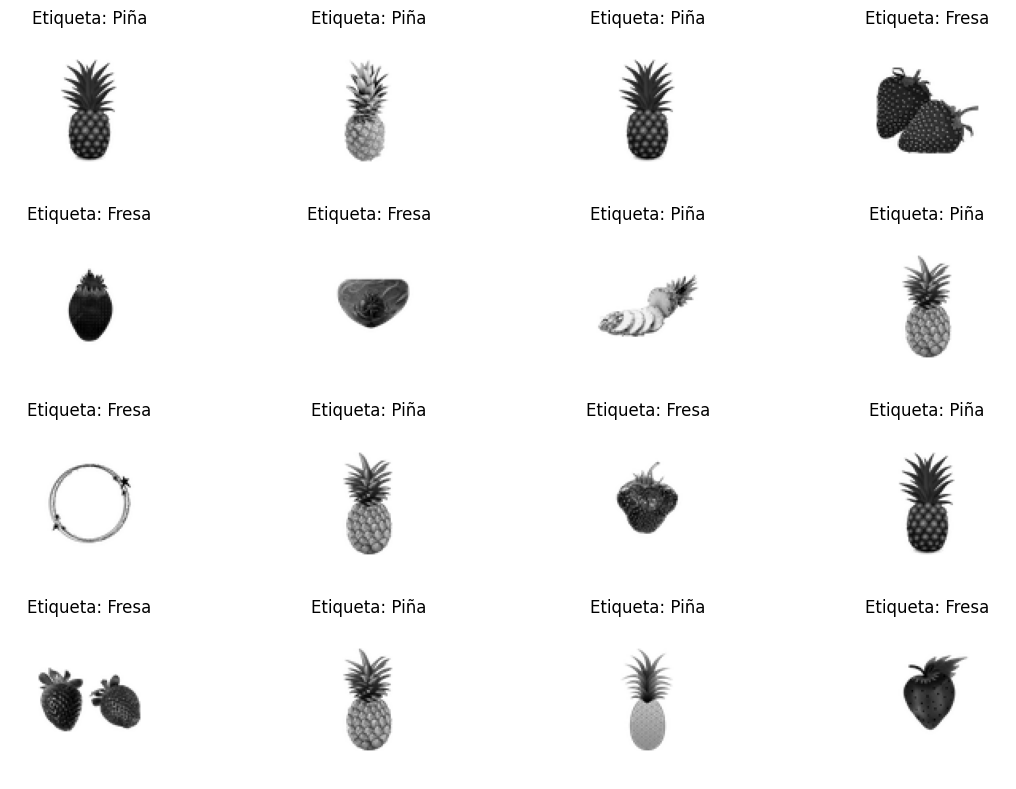

In [105]:
train_loader, test_loader = cargar_dataset_frutas()

# Mostrar información del dataset
print(f"Tamaño del conjunto de entrenamiento: {len(train_loader.dataset)} imágenes")
print(f"Tamaño del conjunto de prueba: {len(test_loader.dataset)} imágenes")
print(f"Número de batches en entrenamiento: {len(train_loader)}")
print(f"Número de batches en prueba: {len(test_loader)}")

# Visualizar un batch de imágenes
visualizar_batch(train_loader)

In [106]:
#train model
input_dim = 100*100
h_dim = 400
z_dim = 20
epocs=20
batch_size=32
learning_rate=1e-3
#dataset loading
# Create an instance of the vae class
model = VAE(input_dim, h_dim, z_dim)  # Pass arguments to __init__
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss(reduction="sum")

In [59]:
#meter weigths and biases para medir el modelo
import wandb
input_dim = 100*100  # ejemplo para MNIST
h_dim = 400
z_dim = 20
epocs = 50
batch_size = 128
learning_rate = 1e-3
wandb.init(project="vae-frutas")
wandb.watch(model)
wandb.config = {
  "learning_rate": learning_rate,
  "epochs": epocs,
  "batch_size": batch_size
}

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: oceguedaalejandro12 (oceguedaalejandro12-instituto-tecnol-gico-y-de-estudios-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [107]:
from torch.utils.data import DataLoader
import torch
import tqdm
import wandb

# Asegúrate de que estas variables estén definidas


# Asegúrate de iniciar sesión en wandb primero (si no lo has hecho ya)
# wandb.login()

# Asegúrate de que el modelo y el optimizador estén definidos
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# Training loop
for epoch in range(epocs):
    loop = tqdm.tqdm(enumerate(train_loader), total=len(train_loader))
    epoch_loss = 0
    for i, (x, _) in loop:
        # x = x.to(device)  # Mueve los datos a GPU si está disponible
        x = x.view(x.shape[0], -1)
        x_reconstructed, mu, sigma = model(x)

        # Losses
        reconstruction_loss = loss_fn(x_reconstructed, x)
        # Normaliza el KL divergence por el tamaño del batch
        kl_divergence = -0.5 * torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2)) / x.size(0)
        loss = reconstruction_loss + kl_divergence

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Acumular y mostrar
        epoch_loss += loss.item()
        loop.set_postfix(loss=loss.item())

        # Log individual batch loss - actualizado para usar un step global
        global_step = epoch * len(train_loader) + i
        wandb.log({
            "batch_loss": loss.item(),
            "reconstruction_loss": reconstruction_loss.item(),
            "kl_divergence": kl_divergence.item(),
            "global_step": global_step
        })

    # Log epoch total loss
    wandb.log({
        "epoch_loss": epoch_loss / len(train_loader),  # Promedio por batch
        "epoch": epoch
    })

# Cierra wandb al finalizar
wandb.finish()

100%|██████████| 5/5 [00:00<00:00,  5.52it/s, loss=3.63e+4]


batch_loss,█▅▅▅▅▃▅▄▃▄▄▃▂▃▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▁▁▂▁▁▁▅▄▂▃▂
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
epoch_loss,█▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇█
kl_divergence,▁▄▃█▃▂▂▃▂▃▂▃▃▃▃▃▂▃▃▂▂▃▂▃▃▂▂▃▂▂▂▂▂▂▂▂▃▃▂▂
reconstruction_loss,██▆▃▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁
batch_loss,36333.88281
epoch,49
epoch_loss,38218.55156
global_step,249
kl_divergence,153.78058


In [108]:
#funcion de inferencia de cada clase
from torchvision.utils import save_image
data=FrutasDataset(train_images_file, train_labels_file)
def inference(class_num, num_samples=10):
  images=[]
  idx=0
  for x, y in data:
    if y == idx:
      images.append(x)
      idx += 1
    if idx == 2:
      break
  encoding_digit=[idx]
  for d in range(2):
    with torch.no_grad():
      mu, sigma = model.encode(images[d].view(1, input_dim))
    encoding_digit.append((mu, sigma))

  mu, sigma = encoding_digit[class_num]
  for i in range(num_samples):
    epsilon = torch.randn_like(sigma)
    z_sampled = mu + sigma * epsilon
    out=model.decode(z_sampled)
    out= out.view(-1,1,100,100)
    save_image(out, f"generated_{class_num}_{i}.png")


In [113]:
#generando una fresa
inference(2, num_samples=10)